In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
b = 3.0
T = 10000
N_values = [10,20,50,100,200,500,800,1000]

In [3]:
mQ2 =[]
mRg2=[]
for N in N_values:
    x=np.zeros((T,N+1)); y=np.zeros((T,N+1)); z=np.zeros((T,N+1))
    filename = "simulation_FJC_b=3.0_N={}_T=10000.xyz".format(N)
    with open(filename, 'r') as file:
        for t in range(T):
            file.readline()
            file.readline()
            for n in range(N+1):
                data = file.readline()
                x[t,n] = float(data.split()[1])
                y[t,n] = float(data.split()[2])
                z[t,n] = float(data.split()[3])  
    Q_N=[];Rg_N=[]
    for t in range(T):
        Q_N.append(np.sqrt((x[t,-1]-x[t,0])**2+(y[t,-1]-y[t,0])**2+(z[t,-1]-z[t,0])**2))
        Rcm = [np.mean(x[t,:]),np.mean(y[t,:]),np.mean(z[t,:])]
        Rg_N.append(np.sqrt(np.mean((x[t,:]-Rcm[0])**2 + (y[t,:]-Rcm[1])**2 + (z[t,:]-Rcm[2])**2)))
        #results.append({'N':N,'Q':Q_N,'Rg':Rg_N})
    mQ2_sim=np.mean(np.array(Q_N)**2)
    mQ2.append(mQ2_sim)
    mRg2_sim=np.mean(np.array(Rg_N)**2)
    mRg2.append(mRg2_sim)
    
    
    


In [4]:
N_values

[10, 20, 50, 100, 200, 500, 800, 1000]

Text(0, 0.5, 'mean Q^2 values')

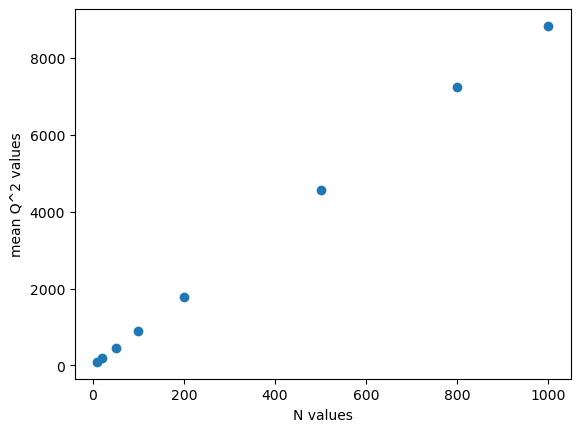

In [5]:
plt.scatter(N_values,mQ2)
plt.xlabel('N values')
plt.ylabel('mean Q^2 values')

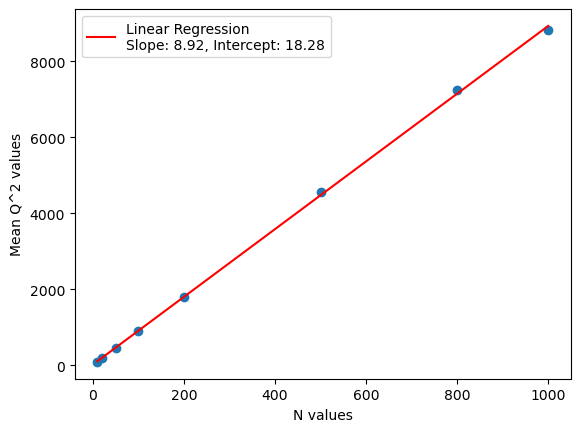

In [9]:
# Linear regression
plt.scatter(N_values,mQ2)
plt.xlabel('N values')
plt.ylabel('mean Q^2 values')
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(N_values, mQ2)
regression_line = slope * np.array(N_values) + intercept

# Plot the regression line
plt.plot(N_values, regression_line, color='red', label=f'Linear Regression\nSlope: {slope:.2f}, Intercept: {intercept:.2f}')

plt.xlabel('N values')
plt.ylabel('Mean Q^2 values')
plt.legend()
plt.show()

Text(0, 0.5, 'mean Rg^2 values')

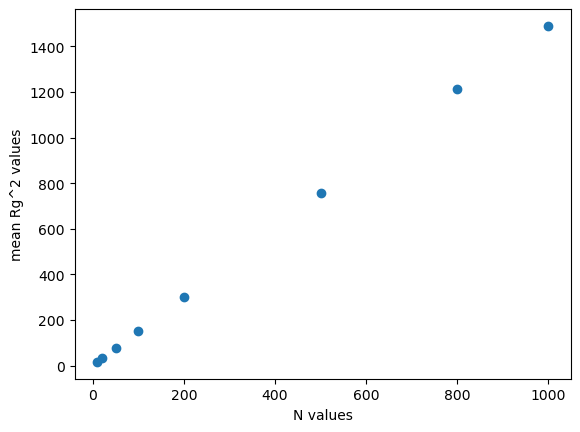

In [7]:
plt.scatter(N_values,mRg2)
plt.xlabel('N values')
plt.ylabel('mean Rg^2 values')

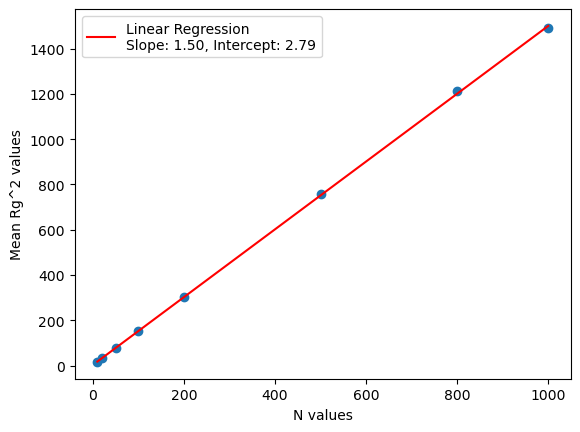

In [10]:
plt.scatter(N_values,mRg2)
plt.xlabel('N values')
plt.ylabel('mean Rg^2 values')
slope, intercept, r_value, p_value, std_err = linregress(N_values, mRg2)
regression_line = slope * np.array(N_values) + intercept

# Plot the regression line
plt.plot(N_values, regression_line, color='red', label=f'Linear Regression\nSlope: {slope:.2f}, Intercept: {intercept:.2f}')

plt.xlabel('N values')
plt.ylabel('Mean Rg^2 values')
plt.legend()
plt.show()

In [11]:
N = 100
P_Q =[]
for Q in Q_N:
    P = (4 * np.pi * Q**2 * (3 / (2 * np.pi * N * b**2))**(3 / 2) * np.exp(-3 * Q**2 / (2 * N * b**2)))
    P_Q.append(P)
    

Text(0.5, 0, 'Q ')

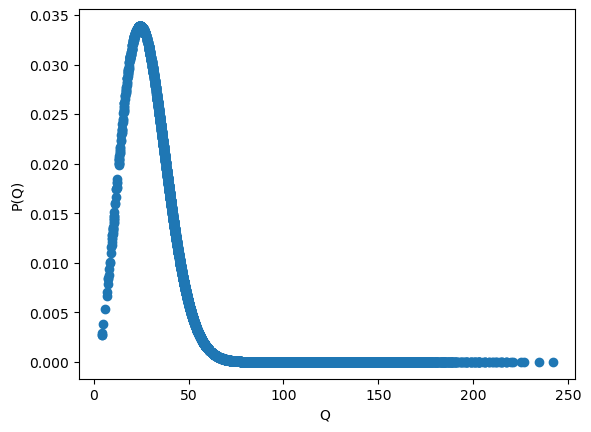

In [15]:
plt.scatter(Q_N,P_Q)
plt.ylabel('P(Q)')
plt.xlabel('Q ')

(array([1.47790099e-03, 6.21897369e-03, 9.88214709e-03, 1.00800427e-02,
        7.52845292e-03, 4.29475502e-03, 1.76000745e-03, 6.56844885e-04,
        1.81053398e-04, 2.52632648e-05]),
 array([  4.25276816,  28.00266763,  51.75256711,  75.50246659,
         99.25236606, 123.00226554, 146.75216502, 170.5020645 ,
        194.25196397, 218.00186345, 241.75176293]),
 <BarContainer object of 10 artists>)

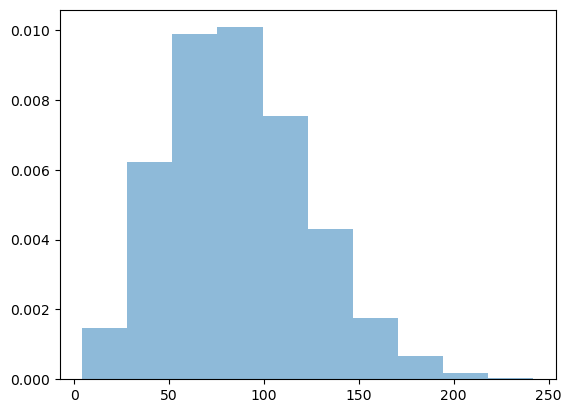

In [18]:
plt.hist(Q_N,bins=None,density =True,alpha =0.5)

Text(0.5, 0, 'Q ')

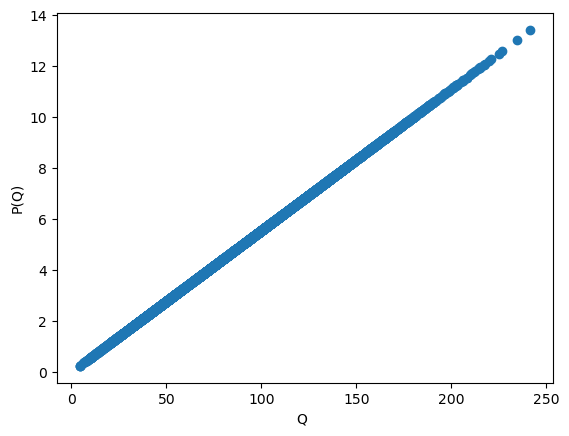

In [21]:
N = 100
P_Q =[]
for Q in Q_N:
    P = Q/(2*b**2)
    P_Q.append(P)
plt.scatter(Q_N,P_Q)
plt.ylabel('P(Q)')
plt.xlabel('Q ')